In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Téléchargement des données

path=""
data=pd.read_csv(path+"data.csv",sep=",",header=0)
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [112]:
#data

# Analyse exploratoire des données 

### On travaille le jeux de données  

#### 1) Vérifier la nature des différentes variables et leur encodage. 

In [3]:
#On transforme 'Year' en une variable qualitative
data = pd.DataFrame(data)
data.head()
data['Year'] = data['Year'].astype('category')

data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'], errors='coerce')
print(data.dtypes)

Entity                                                                object
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

#### 2. Déterminez le taux de valeurs manquantes pour chaque variable

In [4]:
#Calcul du taux de valeurs manquantes 

Missing_value = {}

for col in data.columns: 
     Missing_value[col] = data[col].isna().sum()/36.49
        
#print(Missing_value)

#suppression des données 
data=data.drop('Renewable-electricity-generating-capacity-per-capita', axis=1)
data=data.drop('Financial flows to developing countries (US $)', axis=1)
data=data.drop('Renewables (% equivalent primary energy)', axis=1)

#### 3. Enlever les individus qui ont des valeurs manquantes 

In [5]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
1,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
2,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.939110,67.709953
3,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,Zimbabwe,2015,33.700000,29.50,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
2764,Zimbabwe,2016,42.561730,29.80,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
2765,Zimbabwe,2017,44.178635,29.80,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
2766,Zimbabwe,2018,45.572647,29.90,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857


In [6]:
data.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000
mean,76.073921,61.529949,36.757973,78.706019,15.891102,27.555329,41.006385,24345.167562,5.468888,1.740413e+05,3.846607,12365.151752,127.760116,6.808566e+05,18.143711,11.037845
std,31.767362,39.256953,29.955577,380.954100,80.131992,109.449341,34.283580,34533.783236,3.590403,8.321897e+05,4.646305,18764.236801,136.769059,1.731288e+06,25.240660,65.568731
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,51.633116,21.700000,9.927500,0.280000,0.000000,0.120000,7.833861,2752.572175,3.350000,2.190000e+03,1.713263,1191.959749,30.000000,3.612500e+04,1.650801,-11.779889
50%,96.757080,79.725000,29.820000,2.970000,0.000000,1.930000,37.312574,11555.610500,4.465000,1.018000e+04,3.730610,4099.705847,81.000000,1.471810e+05,15.870032,17.873887
75%,100.000000,100.000000,61.965000,24.870000,0.000000,10.912500,68.643873,30163.321500,6.160000,6.008000e+04,5.900678,14104.523310,153.000000,5.053700e+05,40.069099,42.776031
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,668.000000,9.984670e+06,64.963051,178.065032


In [7]:
print("La taille des données est" , data.shape)

La taille des données est (2768, 18)


### Analyse descriptive unidimentionnelle 

#### 4. Transformation de certaines varibales 

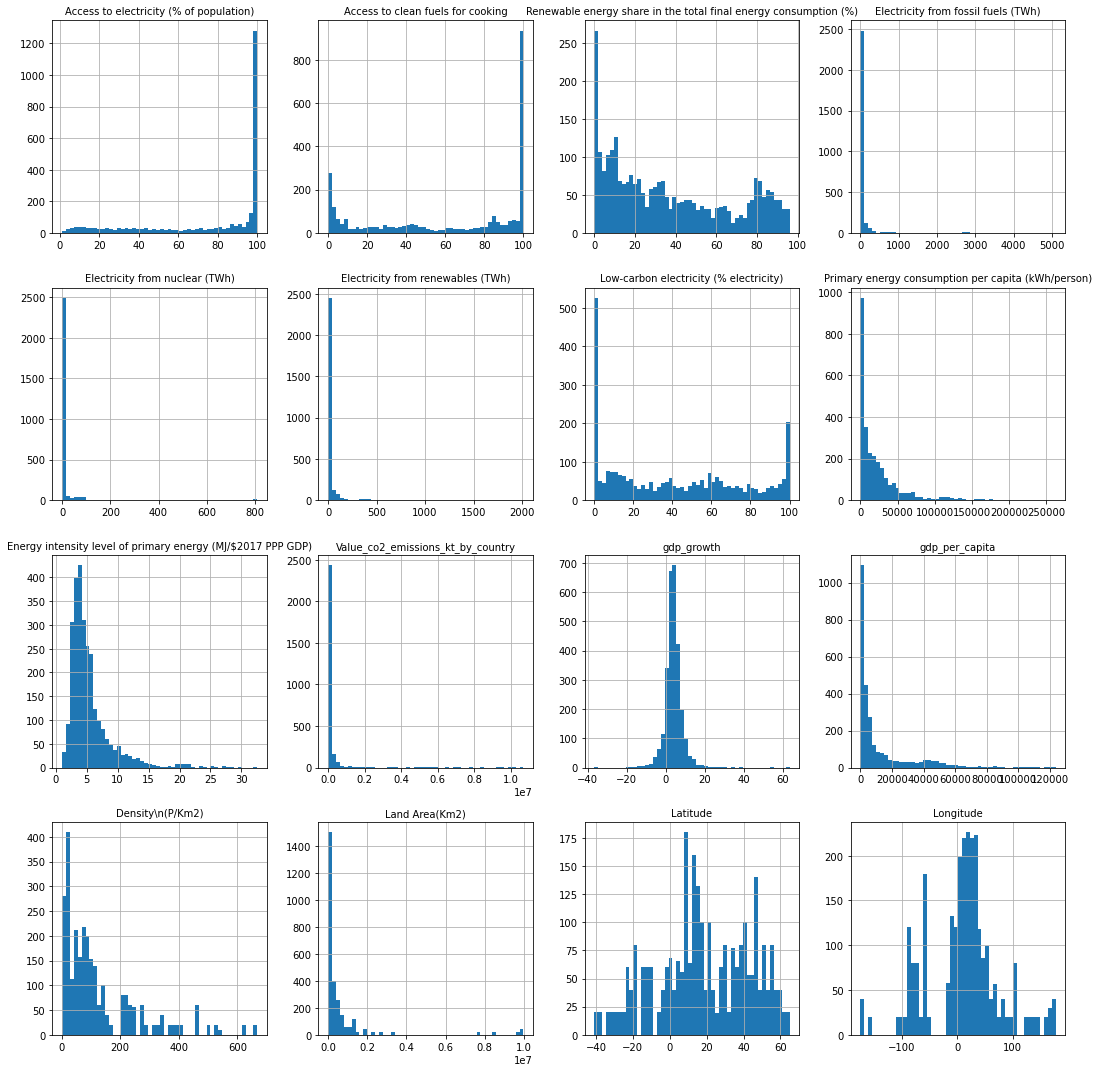

In [26]:
fig ,axs = plt.subplots(4,4, figsize=(15,15)) 

col = data.columns
axs = axs.flatten()

for i in range(len(col) - 2):
    data[col[i + 2]].hist(ax=axs[i], bins = 50)
    axs[i].set_title(col[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

On va recentrer les variables qui semblent très éparpillées : 
- Electricity from fossil fuels (TWh)                                
- Electricity from nuclear (TWh)                                       
- Electricity from renewables (TWh)  
- Primary energy consumption per capita (kWh/person)                   
- Energy intensity level of primary energy          
- Value_co2_emissions_kt_by_country
- gdp_growth                                                          
- gdp_per_capita                                                       
- Density\n(P/Km2)


In [9]:
%matplotlib inline
from math import sqrt, log
data_2=data

In [63]:
#A décommenter si nouveau noyau. Pensez à commenter sinon pb car la colomne est déjà supprimée 

data_2["Electricity from fossil fuels (TWh)" + '_log']=data_2["Electricity from fossil fuels (TWh)"].map(lambda x: log(x+1))
del data_2["Electricity from fossil fuels (TWh)"]

data_2["Electricity from renewables (TWh)" + '_log']=data_2["Electricity from renewables (TWh)"].map(lambda x: log(x+1))
del data_2["Electricity from renewables (TWh)"]

data_2["Electricity from nuclear (TWh)"+ '_log']=data_2["Electricity from nuclear (TWh)"].map(lambda x: log(x+1))
del data_2["Electricity from nuclear (TWh)"]

data_2["Primary energy consumption per capita (kWh/person)"+ '_log']=data_2["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(x+1))
del data_2["Primary energy consumption per capita (kWh/person)"]

data_2["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"+ '_log']=data_2["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: sqrt(x))
del data_2["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"]

data_2["Value_co2_emissions_kt_by_country" + '_log']=data_2["Value_co2_emissions_kt_by_country"].map(lambda x: log(x+1))
del data_2["Value_co2_emissions_kt_by_country"]

data_2["gdp_growth"+ '_log']=data_2["gdp_growth"].map(lambda x: log(x+40))
del data_2["gdp_growth"]

data_2["gdp_per_capita"+ '_log']=data_2["gdp_per_capita"].map(lambda x: log(x+1))
del data_2["gdp_per_capita"]

data_2['Density\\n(P/Km2)'+ '_log']=data_2['Density\\n(P/Km2)'].map(lambda x: log(x+1))
del data_2['Density\\n(P/Km2)']


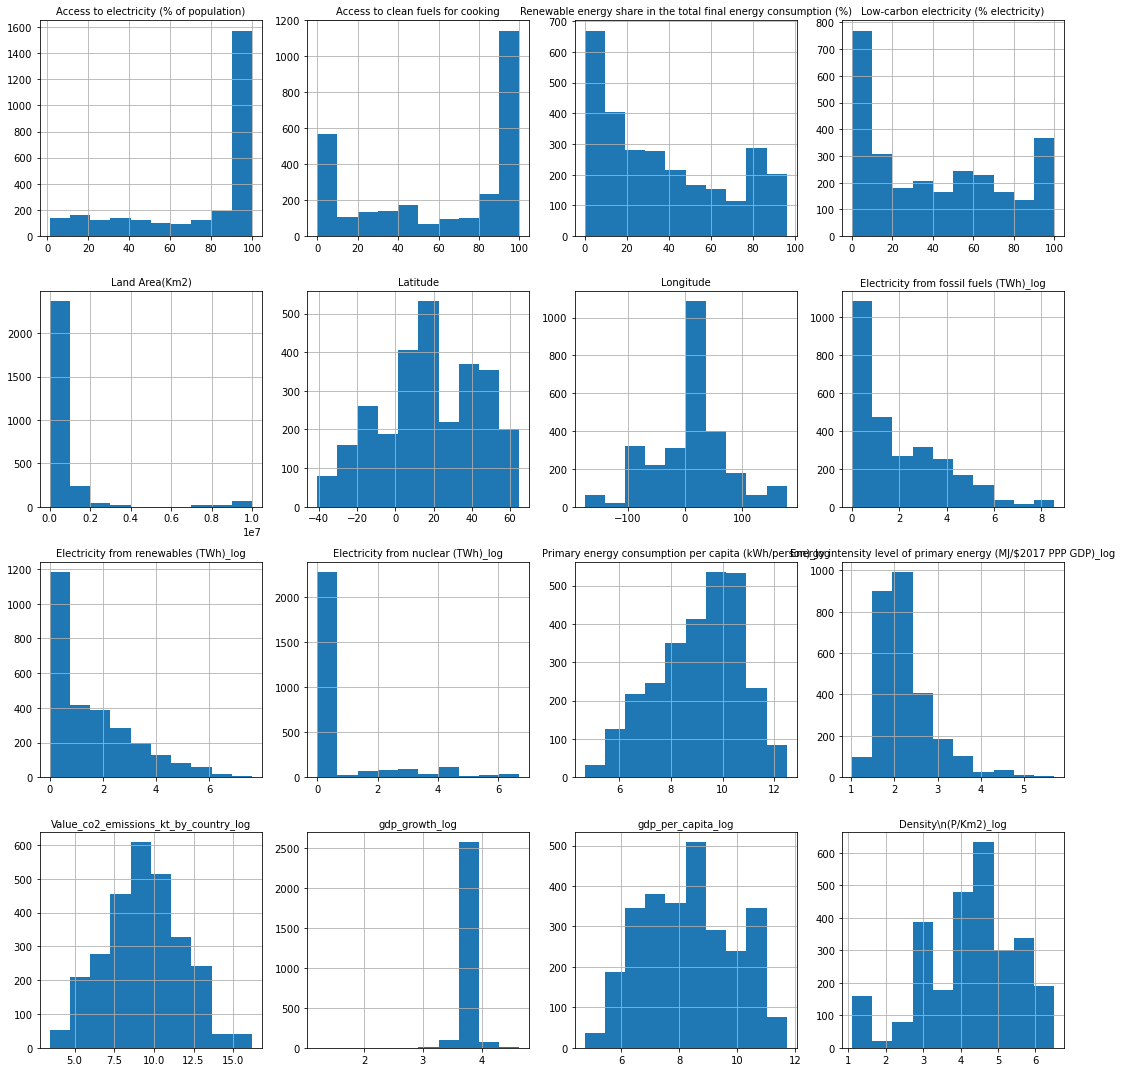

In [66]:
fig2 ,axs2 = plt.subplots(4,4, figsize=(15,15)) 

col2 = data_2.columns
axs2 = axs2.flatten()

for i in range(len(col2) - 2):
    data_2[col2[i + 2]].hist(ax=axs2[i])
    axs2[i].set_title(col2[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

Idée : Affichage du CO2 en fonction de la localisation du pays (voir ADD) scatter map 

#### 5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays

In [113]:
#Nombre d'années de relevé par Pays 

Pays_valeurs = data.Entity.value_counts()
print(Pays_valeurs)
print('')

Latvia              20
Namibia             20
Peru                20
Paraguay            20
Papua New Guinea    20
                    ..
Eritrea             12
Nauru               10
Somalia              6
Djibouti             6
South Sudan          3
Name: Entity, Length: 143, dtype: int64



In [114]:
#On créer un tableau avec la moyenne pour chaque pays de l'emission en CO2

data_np = data.to_numpy()
CO2 = []
ind=0
CO2.append(data_np[0][11])
Pays = []
Pays.append(data_np[0][0])

for i in range(data_np.shape[0] -1) : 
    if data_np[i+1][0]== data_np[i][0] : 
        CO2[ind]+= data_np[i+1][11]
    else : 
        CO2[ind] = CO2[ind]/Pays_valeurs[data_np[i][0]] #moyenne de la somme de CO2 produite sur les années de prélèvement 
        CO2.append(data_np[i+1][11])
        Pays.append(data_np[i+1][0])
        ind+=1


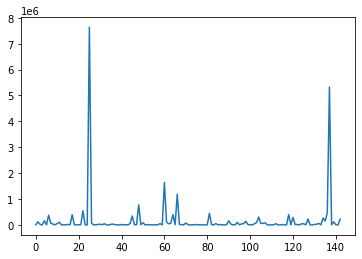

In [115]:
#Affichage de la valeur CO2 
plt.plot(CO2)

In [116]:
#CO2 pour chaque pays 
CO2_Pays = dict(zip(Pays, CO2))
CO2_Pays_trie = dict(sorted(CO2_Pays.items(), key=lambda item: item[1], reverse=True))
print('Les 5 pays produisant le plus de CO2 en cummulé sont :')

for Pays, CO2 in list(CO2_Pays_trie.items())[:5]:
    print(f"{Pays}: {CO2} ")
#CO2_trie = np.sort(CO2)[::-1]


Les 5 pays produisant le plus de CO2 en cummulé sont :
China: 7636642.46335 
United States: 5329538.5342 
India: 1633978.99966 
Japan: 1183734.48525 
Germany: 773644.502685 


### Analyse descriptive multidimentionnelle 

#### 6. Analyse des dépendances entre les variables quantitatives.

In [74]:
data_quanti = data[data.columns[2:18]]

data_quanti = data_quanti.rename(columns={'Access to electricity (% of population)': 'Access elec'})
data_quanti = data_quanti.rename(columns={'Renewable energy share in the total final energy consumption (%)': 'Renewable energie'})
data_quanti = data_quanti.rename(columns={'Electricity from fossil fuels (TWh)': 'Elec fossil fuels'})
data_quanti = data_quanti.rename(columns={'Electricity from nuclear (TWh)': 'Ele nuclear'})
data_quanti = data_quanti.rename(columns={'Electricity from renewables (TWh)': 'Elec renewables'})
data_quanti = data_quanti.rename(columns={'Low-carbon electricity (% electricity)' : 'Low-carbon elec'})
data_quanti = data_quanti.rename(columns={'Primary energy consumption per capita (kWh/person)': 'Primary energy cons per capita'})
data_quanti = data_quanti.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Intensity lev of primary energy'})
data_quanti = data_quanti.rename(columns={'Value_co2_emissions_kt_by_country': 'Co2_by_country'})

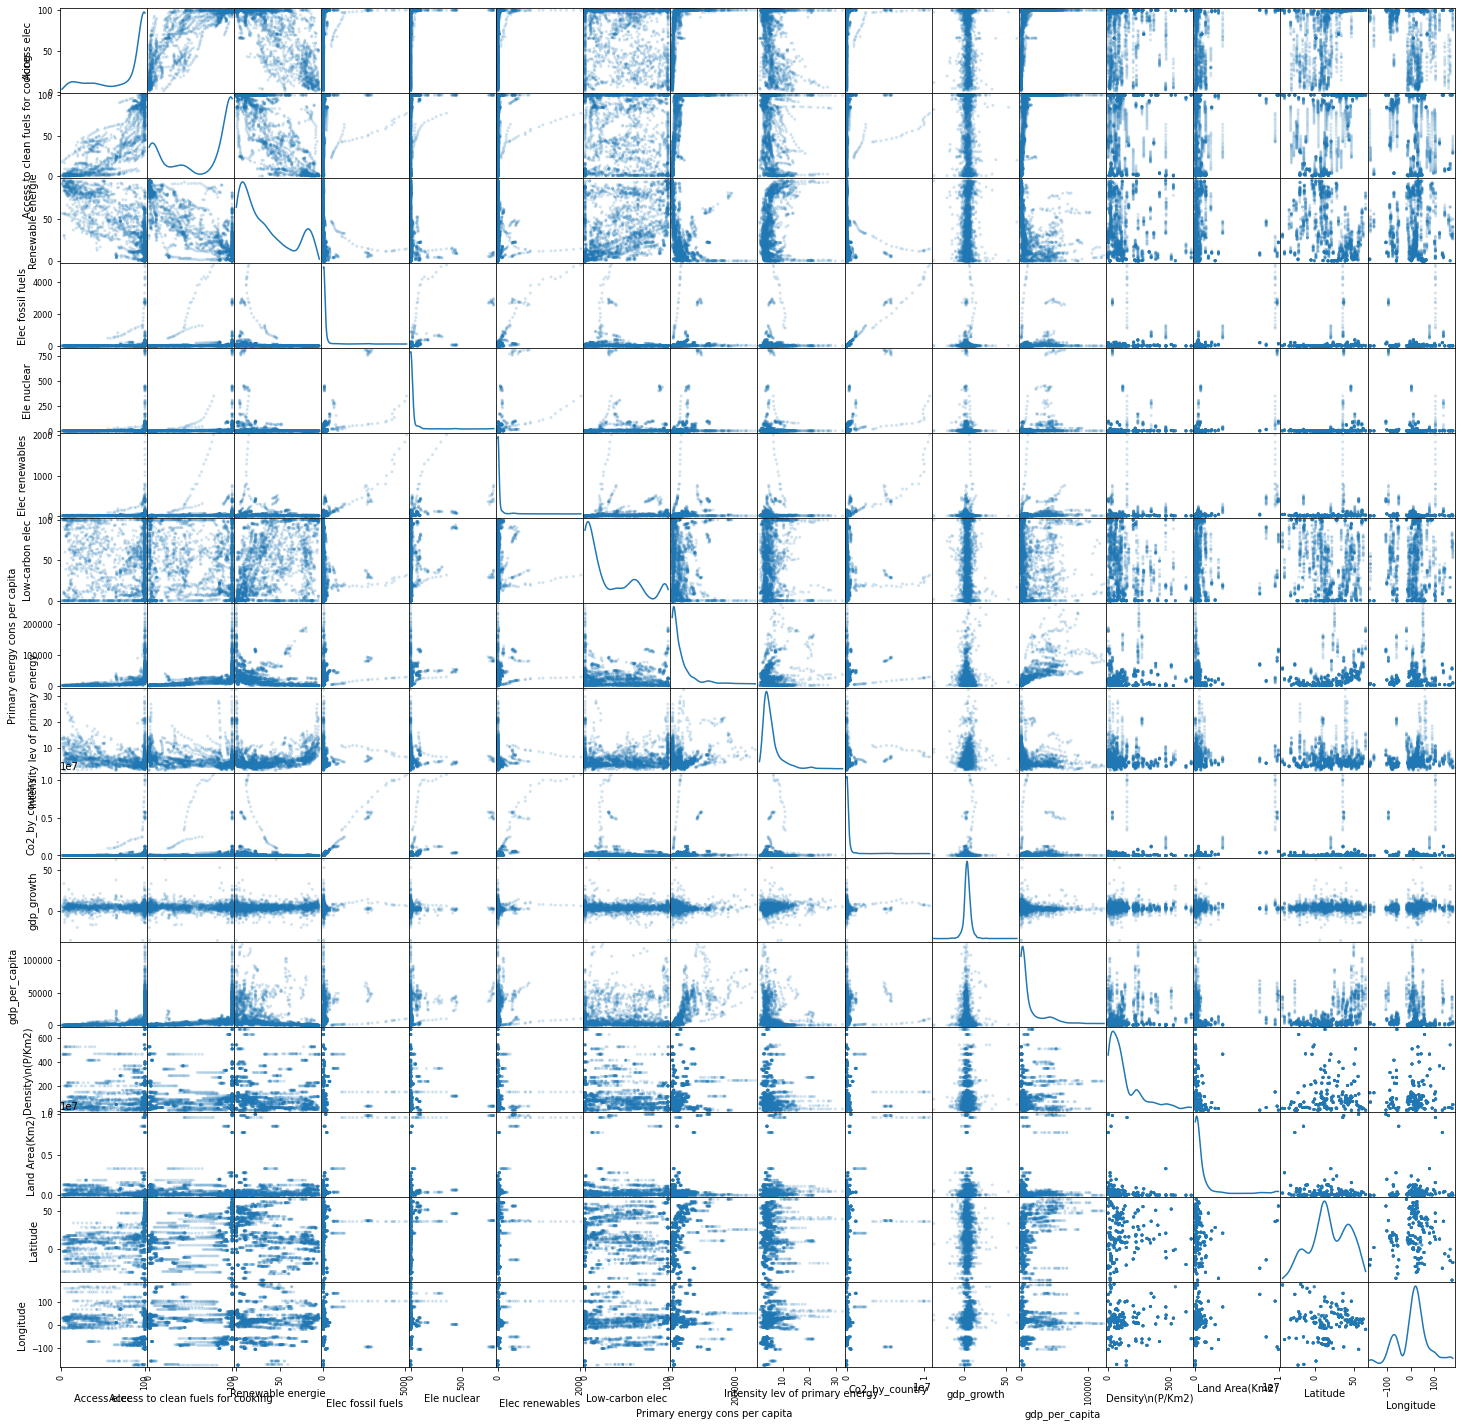

In [77]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_quanti, alpha=0.2, 
               figsize=(25, 25), diagonal='kde')
plt.show()

Trop de varibales pour le graph soit clair et lisible. On va selectionner les variables les plus pertinantes. 

Du graphique ci dessus on voit que les varibales des cases 4,5,6 et 10 (axis) ne semble pas corrélées avec d'autres variables. On va donc les enlever. 

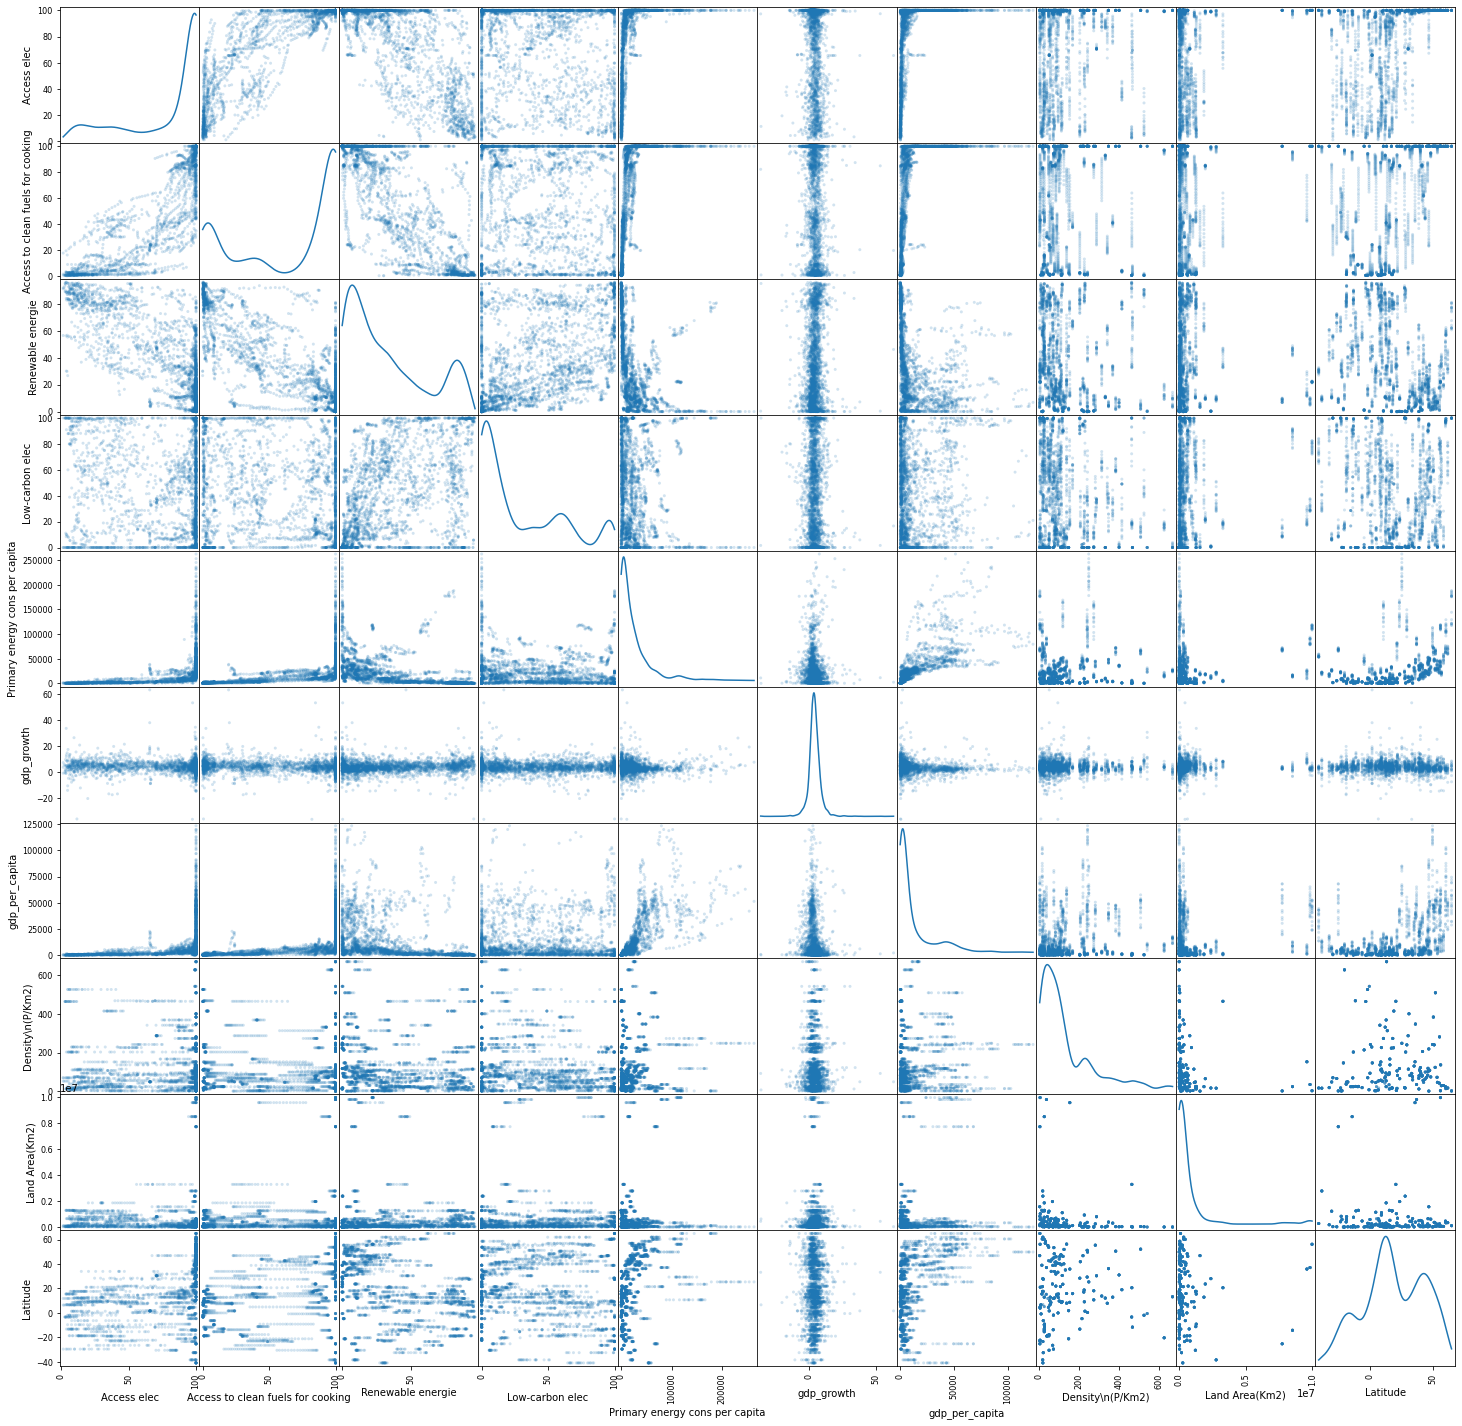

In [79]:
selected_columns = data_quanti.iloc[:, 0:3].columns.tolist() + data_quanti.iloc[:, 6:8].columns.tolist()+ data_quanti.iloc[:, 10:15].columns.tolist()

# Sélectionner les colonnes dans le dataframe
selected_data = data_quanti[selected_columns]

scatter_matrix(selected_data, alpha=0.2, 
               figsize=(25, 25), diagonal='kde')
plt.show()

### Analyse en composantes principales 

#### 7. ACP 

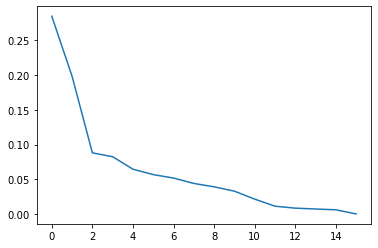

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix

data_scaled=scale(data[data.columns[2:18]])
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.show()

Il semble difficil d'identifier le coude, 2 dimensions semble peu probable. Voyant les variances cumulées. 

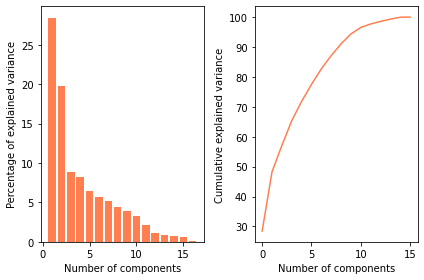

Varianceexpliquée par les 10 premières composentes: 94.38


In [104]:
# %load solutions/pca/pca_components.py
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 16
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()
print("Varianceexpliquée par les 10 premières composentes:", round(sum([explained_variance_ratio[i] for i in range(10)]),2))

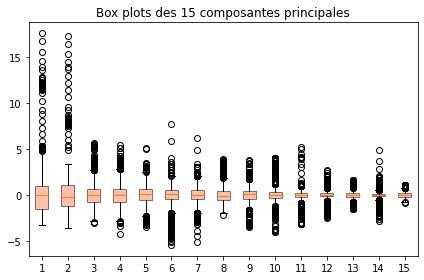

In [105]:
box = plt.boxplot(data_pca[:,:15], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 15 composantes principales")
plt.tight_layout()
plt.show()

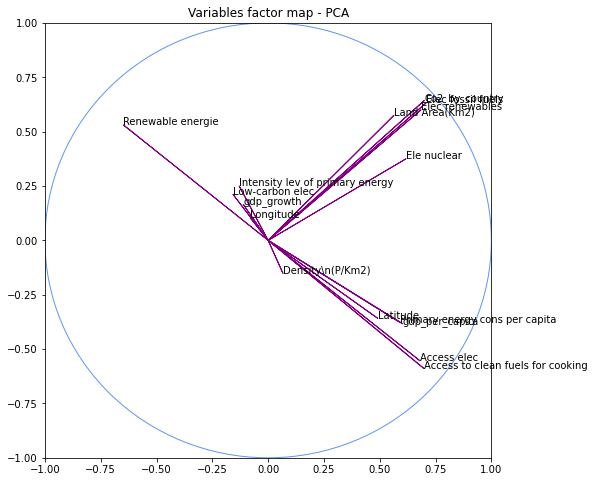

In [107]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_quanti.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.show()

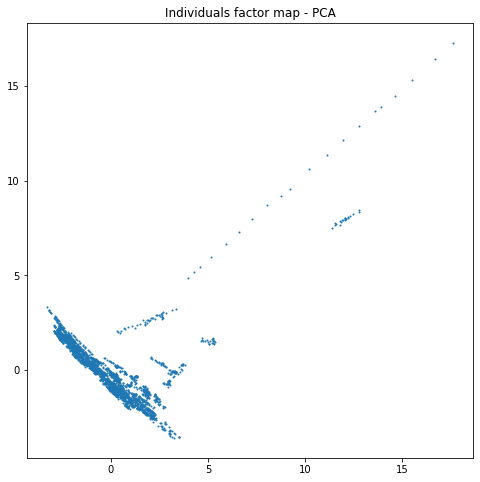

In [111]:
plt.figure(figsize=(8,8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=1, linewidths=1)
plt.title("Individuals factor map - PCA")
plt.show()

Au final on va continuer l'analyse en se restreignant à 10 composantes. 

In [110]:
data_reduced = data_pca[:,:10]

#### 8) Visualiser la dépendence de la varibale 'Year' et de la varibale à prédire